<a href="https://colab.research.google.com/github/pe44enka/AirbnbPricePrediction/blob/master/MLModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb Price Prediction**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

![](https://media.bizj.us/view/img/11311656/most-popular-airbnb-experiences-in-san-francisco*1200xx5333-3000-0-0.jpg)


### Objectives

Airbnb is a platform business that provides and guides an opportunity to link two groups - the hosts and the guests. Anybody with an open room or free space can become a host on Airbnb and offer it to global community. It is a good way to provide extra income with minimal effort. It is an easy way to advertise space because the platform has the traffic and a global user base to support it. Airbnb gives hosts an easy way to monetize a space that would otherwise be going to waste.

On the other side we have guests with a very specific needs - some might be seeking affordable accomodation close to the city attractions while others a luxurious apartment by the sea. They might be groups, families or individuals both local and foreign. After every visit guests have an opportunity to rate they stay and leave their feedback.

---

### Goal of the project
To built ML model to predict the price of rent on Airbnb and find out which factors might influent on it the most

### Data
[San Francisco Airbnb](https://www.kaggle.com/jeploretizo/san-francisco-airbnb-listings) dataset available at Kaggle

---

# **Part II. Machine Learning Modeling**


In this notebook I have applied different ML regression algorithms to pridict price of rent on Airbnb. For this I used early preproccesed [data](https://https://colab.research.google.com/drive/1p_vUEJ0Iph-dr2jhjHZnu5DnmPCXS74c#scrollTo=a0hYQ13lK6W0). I started with simple Linear Regression model and tried some tree-based model after with special attention to XGBoost parameters tuning. I also used tree-based models to find out which features influent on the price the most.

---



# Linear Regression

## Load Data

In [256]:
df = pd.read_csv('https://raw.githubusercontent.com/pe44enka/AirbnbPricePrediction/master/data/SF_cleaned_lr.csv')
print(df.shape)
df.head()

(7597, 77)


,host_since,host_local,host_response_rate_pct,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,emenities_num,price,security_deposit,cleaning_fee,guests_included,extra_people,min_nights,number_of_reviews,instant_bookable,require_guest_profile_picture,host_listing_count,listing_duration,review_per_month,review_score,host_response_time_few_days,host_response_time_few_hours,host_response_time_hour,neighbourhood_Bernal Heights,neighbourhood_Castro/Upper Market,neighbourhood_Chinatown,neighbourhood_Crocker Amazon,neighbourhood_Diamond Heights,neighbourhood_Downtown/Civic Center,neighbourhood_Excelsior,neighbourhood_Financial District,neighbourhood_Glen Park,neighbourhood_Golden Gate Park,neighbourhood_Haight Ashbury,neighbourhood_Inner Richmond,neighbourhood_Inner Sunset,neighbourhood_Lakeshore,neighbourhood_Marina,neighbourhood_Mission,neighbourhood_Nob Hill,neighbourhood_Noe Valley,neighbourhood_North Beach,neighbourhood_Ocean View,neighbourhood_Outer Mission,neighbourhood_Outer Richmond,neighbourhood_Outer Sunset,neighbourhood_Pacific Heights,neighbourhood_Parkside,neighbourhood_Potrero Hill,neighbourhood_Presidio,neighbourhood_Presidio Heights,neighbourhood_Russian Hill,neighbourhood_Seacliff,neighbourhood_South of Market,neighbourhood_Treasure Island/YBI,neighbourhood_Twin Peaks,neighbourhood_Visitacion Valley,neighbourhood_West of Twin Peaks,neighbourhood_Western Addition,property_type_Hotel,property_type_House,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,rent_term_short_term
0,2008,1,1.00,1,1,1,3,1.0,1,32,170,100,100,2,25,1,217,0,0,1,3735,1.8,9.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,2008,1,1.00,1,1,1,2,1.0,1,30,99,0,10,2,20,1,160,0,0,3,3742,1.3,10.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
2,2009,1,0.80,0,1,1,5,1.0,2,17,235,0,100,2,0,30,111,0,0,1,3816,0.9,9.83,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,2009,1,0.86,1,1,1,2,4.0,1,18,65,200,50,1,12,32,18,0,0,9,3696,0.1,8.50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,2009,1,0.86,1,1,1,2,4.0,1,16,65,200,50,1,12,32,8,0,0,9,1862,0.1,9.33,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0




---

Data was preprocessed earlier, but let's confirm that there is neither missing data nor categorical features.

---



In [103]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [104]:
df.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')

## Arrange Data

### Feature Matrix & Target Vector


As first step, let's arrange data into feature matrix and target vector (`price`).

---

In [257]:
y = df.pop('price')
X = df
print('X.shape: ', X.shape, '\ny.shape: ', y.shape)

X.shape:  (7597, 76) 
y.shape:  (7597,)


### Data Standartization



Before applying Linear Regression Model we need to standartize feature matrix:
* make sure that mean of values in each such a column = 0
* standart deviation through each column = 1

If the data is not standartized varience of one columns can be much bigger than varience of another one what makes it impossible to compare them.

We will standartize just the columns which values vary not between 0 and 1 => mean of the column is more than 1.

---



In [231]:
#cols to stanndatize
cols_to_standart = X.mean()[X.mean()>1].index.tolist()
cols_to_standart

['host_since',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'emenities_num',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'min_nights',
 'number_of_reviews',
 'host_listing_count',
 'listing_duration',
 'review_per_month',
 'review_score']

In [258]:
#data standartization
std = StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X[cols_to_standart]), columns=cols_to_standart)
print(X_std.shape)
X_std.head()

(7597, 15)


,host_since,accommodates,bathrooms,bedrooms,emenities_num,security_deposit,cleaning_fee,guests_included,extra_people,min_nights,number_of_reviews,host_listing_count,listing_duration,review_per_month,review_score
0,-2.525224,0.018350,-0.385266,-0.308769,0.435115,-0.367661,0.099758,0.319896,0.336753,-0.011487,2.115158,-0.404634,3.672382,0.073726,0.542253
1,-2.525224,-0.579964,-0.385266,-0.308769,0.250395,-0.521609,-0.984384,0.319896,0.159368,-0.011487,1.406054,-0.368852,3.681083,-0.146369,0.585491
2,-2.129487,1.214979,-0.385266,0.906001,-0.950287,-0.521609,0.099758,0.319896,-0.550170,-0.011462,0.796474,-0.404634,3.773065,-0.322445,0.542253
3,-2.129487,-0.579964,2.933179,-0.308769,-0.857926,-0.213713,-0.502543,-0.539456,-0.124447,-0.011460,-0.360484,-0.261505,3.623905,-0.674597,0.203975
4,-2.129487,-0.579964,2.933179,-0.308769,-1.042647,-0.213713,-0.502543,-0.539456,-0.124447,-0.011460,-0.484888,-0.261505,1.344244,-0.674597,0.415081


In [259]:
X = X.drop(columns=cols_to_standart)
X = X.merge(X_std, left_index=True, right_index=True, how='left')
print(X.shape)
X.head()

(7597, 76)


,host_local,host_response_rate_pct,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,require_guest_profile_picture,host_response_time_few_days,host_response_time_few_hours,host_response_time_hour,neighbourhood_Bernal Heights,neighbourhood_Castro/Upper Market,neighbourhood_Chinatown,neighbourhood_Crocker Amazon,neighbourhood_Diamond Heights,neighbourhood_Downtown/Civic Center,neighbourhood_Excelsior,neighbourhood_Financial District,neighbourhood_Glen Park,neighbourhood_Golden Gate Park,neighbourhood_Haight Ashbury,neighbourhood_Inner Richmond,neighbourhood_Inner Sunset,neighbourhood_Lakeshore,neighbourhood_Marina,neighbourhood_Mission,neighbourhood_Nob Hill,neighbourhood_Noe Valley,neighbourhood_North Beach,neighbourhood_Ocean View,neighbourhood_Outer Mission,neighbourhood_Outer Richmond,neighbourhood_Outer Sunset,neighbourhood_Pacific Heights,neighbourhood_Parkside,neighbourhood_Potrero Hill,neighbourhood_Presidio,neighbourhood_Presidio Heights,neighbourhood_Russian Hill,neighbourhood_Seacliff,neighbourhood_South of Market,neighbourhood_Treasure Island/YBI,neighbourhood_Twin Peaks,neighbourhood_Visitacion Valley,neighbourhood_West of Twin Peaks,neighbourhood_Western Addition,property_type_Hotel,property_type_House,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,rent_term_short_term,host_since,accommodates,bathrooms,bedrooms,emenities_num,security_deposit,cleaning_fee,guests_included,extra_people,min_nights,number_of_reviews,host_listing_count,listing_duration,review_per_month,review_score
0,1,1.00,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,-2.525224,0.018350,-0.385266,-0.308769,0.435115,-0.367661,0.099758,0.319896,0.336753,-0.011487,2.115158,-0.404634,3.672382,0.073726,0.542253
1,1,1.00,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,-2.525224,-0.579964,-0.385266,-0.308769,0.250395,-0.521609,-0.984384,0.319896,0.159368,-0.011487,1.406054,-0.368852,3.681083,-0.146369,0.585491
2,1,0.80,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,-2.129487,1.214979,-0.385266,0.906001,-0.950287,-0.521609,0.099758,0.319896,-0.550170,-0.011462,0.796474,-0.404634,3.773065,-0.322445,0.542253
3,1,0.86,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,-2.129487,-0.579964,2.933179,-0.308769,-0.857926,-0.213713,-0.502543,-0.539456,-0.124447,-0.011460,-0.360484,-0.261505,3.623905,-0.674597,0.203975
4,1,0.86,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,-2.129487,-0.579964,2.933179,-0.308769,-1.042647,-0.213713,-0.502543,-0.539456,-0.124447,-0.011460,-0.484888,-0.261505,1.344244,-0.674597,0.415081


### Train/test split



To be able to evaluate future model performance let's divide the data on train and test subsets.

---



In [261]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train.shape: ', X_train.shape, '\tX_test.shape: ', X_test.shape, '\nY_train.shape: ', Y_train.shape, '\tY_test.shape: ', Y_test.shape)

X_train.shape:  (6077, 76) 	X_test.shape:  (1520, 76) 
Y_train.shape:  (6077,) 	Y_test.shape:  (1520,)


## Ordinary Least Squares Model


Let's start with basic Ordinary Least Squares (OLS) Model to create a base line model.

---



In [263]:
X_train1 = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_train1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     97.97
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        05:16:58   Log-Likelihood:                -33926.
No. Observations:                6077   AIC:                         6.800e+04
Df Residuals:                    6001   BIC:                         6.851e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------



---

If we have a look on results of Ordinary Least Squares (OLS) model we can see that some of the feature are not statistical significant (have p-values more then 5%). That means that null hypothesis (y is independent from particular feature) is not rejected => coefficient for this feature should be equal to 0. That let us just drop these features and train OLS model again.

We also can notice than none of dummies created out of following features are significant:
* `host_response_time`
* `bed_type`
* `cancellation_policy`

---



In [281]:
X2 = X.drop(columns=['host_response_rate_pct', 'host_has_profile_pic', 'instant_bookable', 'require_guest_profile_picture', 'host_response_time_few_days', 'host_response_time_few_hours', 'host_response_time_hour', 
                      'neighbourhood_Crocker Amazon', 'neighbourhood_Excelsior', 'neighbourhood_Golden Gate Park', 'neighbourhood_Lakeshore', 'neighbourhood_Ocean View', 'neighbourhood_Outer Sunset', 
                      'neighbourhood_Parkside', 'neighbourhood_Presidio', 'neighbourhood_Seacliff', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'cancellation_policy_moderate',
                      'cancellation_policy_strict', 'cancellation_policy_strict_14_with_grace_period', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'cleaning_fee', 'min_nights',
                      'listing_duration', 'review_score', 'host_is_superhost', 'neighbourhood_Treasure Island/YBI', 'neighbourhood_Visitacion Valley', 'neighbourhood_Outer Mission', 'extra_people'])
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y, test_size=0.2, random_state=0)
print('X_train2.shape: ', X_train2.shape, '\tX_test2.shape: ', X_test2.shape, '\nY_train2.shape: ', Y_train2.shape, '\tY_test2.shape: ', Y_test2.shape)

X_train2.shape:  (6077, 42) 	X_test2.shape:  (1520, 42) 
Y_train2.shape:  (6077,) 	Y_test2.shape:  (1520,)


In [282]:
X_train3 = sm.add_constant(X_train2)

model = sm.OLS(Y_train2, X_train3)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        05:55:59   Log-Likelihood:                -34046.
No. Observations:                6077   AIC:                         6.818e+04
Df Residuals:                    6034   BIC:                         6.847e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co



---

**Model Interpretation**
Now that we have the results of our model, lets try to interpret it in detail.

* `R-squared`: 
  * coefficient of determination, helps us to evaluate model performance
  * since we have multiple independent variables (feature matrix X) we are more interested in adjusted R-squared
* `Adj. R-squared`: tell us that our independent variables (feature matrix X)can explain 52.9% of variations in our dependent variable (target vector y)
* `const` = y-intercept: 
  * has a value of 110.47
  * that means that putting all other X variables at 0, an Entire Apartment in Bayview will have a predicted price of \$110.47 (as long as when we created dummy variables we dropped one dummy from each column which we use as reference)
* coefficients:
  * coefficient of property_type_House is 11.94
  * we interpret as: everything else being constant, an House in Bayview in Manhattan will cost 11.94 more than appartment
  * we can similarly interpret coefficient of bathroom as: with everything else being constant, with every one unit increase in  number of bathrooms, the predicted price decreases by 4.19
* `std error`:  sample standard deviation for each variable
* `t` = value of t-statistic:  z-score of the sample variable (tells us how far a sample is from its mean)
  * z-score=2: the sample is two standard deviation away from the mean
* `p-value`:  suggests how significant these estimates are:
  * p-values < 0.05 => we can reject the Null hypothesis for all variables (all coefficients are not null)
  * alpha = 5%: degree of error we are willing to accept
* confidence intervals: show the upper bound and lower bound for the TRUE POPULATION coefficient with 95% confidence.


---



## Linear Regression Model



With results we got from OLS analysis we can train and evaluate Linear Regression model.

---



In [328]:
lr = LinearRegression()
lr.fit(X_train2, Y_train2)
print('R-squared: ', round(lr.score(X_test2, Y_test2), 3))

R-squared:  0.5




---

We got not so high coefficient of determination (0.5) what means that about 50% of new data might be predicted correct. That is not desired result, so we will try to apply other ML models to get more significant result.

But before that, let's have a look on feature coefficient in the linear regression model to get a clue which features have more influence on result.

---



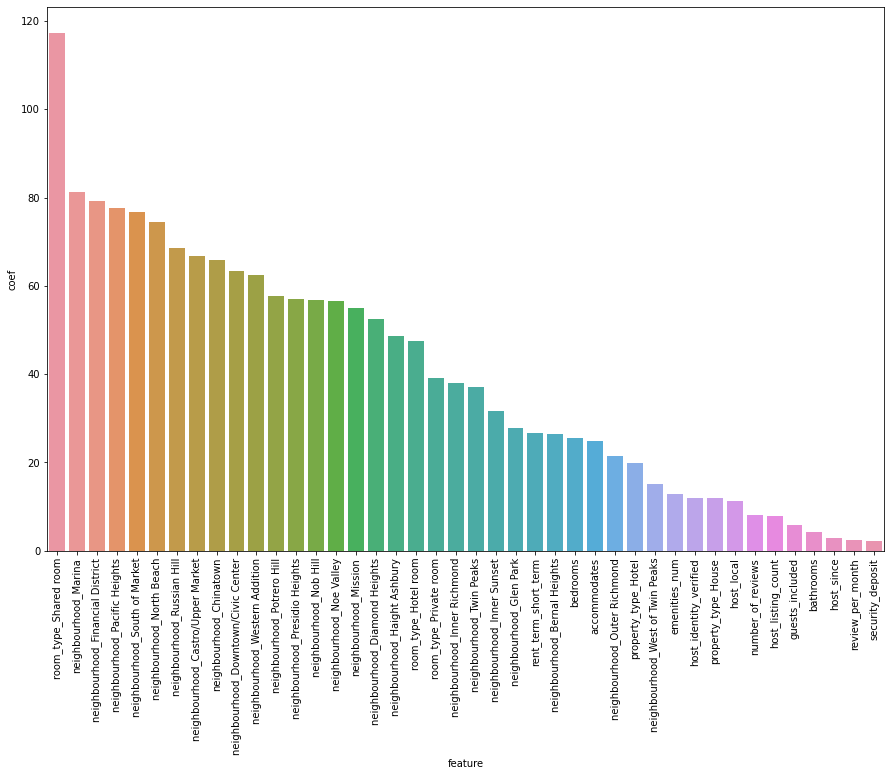

In [311]:
plt.figure(figsize=(15,10))
coef = pd.DataFrame(abs(lr.coef_), columns=['coef'])
coef['feature'] = X_train2.columns
coef.sort_values(by='coef', inplace=True, ascending=False)
sns.barplot(x='feature', y='coef', data=coef)
plt.xticks(rotation=90);



---

Looks like `room_type` and `neighbourhood` have the biggest impact on the price.

---



## Lasso Regression




Lasso Regression or L1 regularization adds penalty equivalent to absolute value of the magnitude of feature coefficients and shrinks some of them to zero: as higher `alpha` hyperparameter as more penalty is added => more coefficients = 0.

To choose the most efficient value of alpha we will use cross-validation.

---



In [356]:
gs_lasso = GridSearchCV(estimator=Lasso(random_state=0), param_grid={'alpha':[10**i for i in range(-3, 4)]}, cv=10, n_jobs=-1)
gs_lasso.fit(X_train, Y_train)
print('Best score: ', gs_lasso.best_score_, '\nBest parameter: ', gs_lasso.best_params_)

Best score:  0.5240022654549155 
Best parameter:  {'alpha': 0.01}


In [376]:
lasso = Lasso(alpha=0.02)
lasso.fit(X_train, Y_train)
print('R-squared: ', round(lasso.score(X_test, Y_test), 3))

R-squared:  0.51




---

We got slightly better result: 51%  of new data might be predicted correct.

Let's have a look on feature that Lasso Regression shrinked to zero which we can consider as less important.

---



In [378]:
coef = pd.DataFrame(abs(lasso.coef_), columns=['coef'])
coef['feature'] = X_train.columns
coef[coef.coef==0]

,coef,feature
32,0.0,neighbourhood_Outer Sunset
36,0.0,neighbourhood_Presidio
39,0.0,neighbourhood_Seacliff
41,0.0,neighbourhood_Treasure Island/YBI
52,0.0,bed_type_Futon
54,0.0,bed_type_Real Bed
59,0.0,cancellation_policy_super_strict_60
70,0.0,min_nights




---

We can notice that `min_nights`, `cancellation_policy` and `bed_type` (which we remove from training data during OLS analysis as well) might have the least impact on the `price`.

---



# Tree-based models

## Load Data

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/pe44enka/AirbnbPricePrediction/master/data/SF_cleaned_tree.csv')
print(df.shape)
df.head()

(7597, 84)


,host_since,host_local,host_response_rate_pct,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,emenities_num,price,security_deposit,cleaning_fee,guests_included,extra_people,min_nights,number_of_reviews,instant_bookable,require_guest_profile_picture,host_listing_count,listing_duration,review_per_month,review_score,host_response_time_day,host_response_time_few_days,host_response_time_few_hours,host_response_time_hour,neighbourhood_Bayview,neighbourhood_Bernal Heights,neighbourhood_Castro/Upper Market,neighbourhood_Chinatown,neighbourhood_Crocker Amazon,neighbourhood_Diamond Heights,neighbourhood_Downtown/Civic Center,neighbourhood_Excelsior,neighbourhood_Financial District,neighbourhood_Glen Park,neighbourhood_Golden Gate Park,neighbourhood_Haight Ashbury,neighbourhood_Inner Richmond,...,neighbourhood_Nob Hill,neighbourhood_Noe Valley,neighbourhood_North Beach,neighbourhood_Ocean View,neighbourhood_Outer Mission,neighbourhood_Outer Richmond,neighbourhood_Outer Sunset,neighbourhood_Pacific Heights,neighbourhood_Parkside,neighbourhood_Potrero Hill,neighbourhood_Presidio,neighbourhood_Presidio Heights,neighbourhood_Russian Hill,neighbourhood_Seacliff,neighbourhood_South of Market,neighbourhood_Treasure Island/YBI,neighbourhood_Twin Peaks,neighbourhood_Visitacion Valley,neighbourhood_West of Twin Peaks,neighbourhood_Western Addition,property_type_Apartment,property_type_Hotel,property_type_House,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,rent_term_long_term,rent_term_short_term
0,2008,1,1.00,1,1,1,3,1.0,1,32,170,100,100,2,25,1,217,0,0,1,3735,1.8,9.83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,2008,1,1.00,1,1,1,2,1.0,1,30,99,0,10,2,20,1,160,0,0,3,3742,1.3,10.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,2009,1,0.80,0,1,1,5,1.0,2,17,235,0,100,2,0,30,111,0,0,1,3816,0.9,9.83,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,2009,1,0.86,1,1,1,2,4.0,1,18,65,200,50,1,12,32,18,0,0,9,3696,0.1,8.50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2009,1,0.86,1,1,1,2,4.0,1,16,65,200,50,1,12,32,8,0,0,9,1862,0.1,9.33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0




---

Data was preprocessed earlier, but let's confirm that there is neither missing data nor categorical features.

---



In [101]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
df.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')

## Arrange Data

### Feature Matrix & Target Vector


As first step, let's arrange data into feature matrix and target vector (`price`).

---

In [107]:
y = df.pop('price')
X = df
print('X.shape: ', X.shape, '\ny.shape: ', y.shape)

X.shape:  (7597, 83) 
y.shape:  (7597,)


### Feature Selection: Random Forest



---



---



In [111]:
gs_feature = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100, bootstrap=True, oob_score=True), param_grid={'max_depth':list(range(1, 21))+[None]}, cv=10, n_jobs=-1)
gs_feature.fit(X, y)
print('Best score: ', gs_feature.best_score_, '\nBest parameter: ', gs_feature.best_params_)

Best score:  0.6125570846563362 
Best parameter:  {'max_depth': 20}


In [112]:
#feature selection by L1 regularization
sfm_model = SelectFromModel(gs_feature.best_estimator_)
sfm_model.fit(X, y)
X = X.loc[:, X.columns[sfm_model.get_support()]]
#X_test = X_test.loc[:, X_test.columns[sfm_model.get_support()]]
print(X.shape)
X.head()

(7597, 15)


,host_since,host_response_rate_pct,accommodates,bathrooms,bedrooms,emenities_num,security_deposit,cleaning_fee,extra_people,min_nights,number_of_reviews,host_listing_count,listing_duration,review_per_month,room_type_Entire home/apt
0,2008,1.00,3,1.0,1,32,100,100,25,1,217,1,3735,1.8,1
1,2008,1.00,2,1.0,1,30,0,10,20,1,160,3,3742,1.3,0
2,2009,0.80,5,1.0,2,17,0,100,0,30,111,1,3816,0.9,1
3,2009,0.86,2,4.0,1,18,200,50,12,32,18,9,3696,0.1,0
4,2009,0.86,2,4.0,1,16,200,50,12,32,8,9,1862,0.1,0


### Train/test split



To be able to evaluate future model performance let's divide the data on train and test subsets.

---



In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train.shape: ', X_train.shape, '\tX_test.shape: ', X_test.shape, '\nY_train.shape: ', Y_train.shape, '\tY_test.shape: ', Y_test.shape)

X_train.shape:  (6077, 15) 	X_test.shape:  (1520, 15) 
Y_train.shape:  (6077,) 	Y_test.shape:  (1520,)


## Tree-based Models

### Decision Tree Model

In [121]:
gs_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), param_grid={'max_depth':list(range(1, 20))+[None]}, cv=10, n_jobs=-1)
gs_dt.fit(X_train, Y_train)
print('Best score: ', gs_dt.best_score_, '\nBest parameter: ', gs_dt.best_params_)

Best score:  0.5484330839755659 
Best parameter:  {'max_depth': 7}


In [122]:
dt = DecisionTreeRegressor(max_depth=7)
dt.fit(X_train, Y_train)
dt.score(X_test, Y_test)

0.537866717055848

### Random Forest Model

In [123]:
gs_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid={'max_depth':list(range(1, 20))+[None]}, cv=10, n_jobs=-1)
gs_rf.fit(X_train, Y_train)
print('Best score: ', gs_rf.best_score_, '\nBest parameter: ', gs_rf.best_params_)

Best score:  0.6573559893505672 
Best parameter:  {'max_depth': 19}


In [124]:
rf = RandomForestRegressor(max_depth=19)
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

0.6243934892618213

### XGBoost

In [127]:
xgb1 = XGBRegressor(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, objective='reg:squarederror', nthread=48, seed=2)
xgb1.fit(X_train, Y_train)
xgb1.score(X_test, Y_test)

0.6167755270220606